In [404]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [405]:
df=pd.read_csv('car_purchasing.csv',encoding="cp1252")

In [406]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [407]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [408]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [409]:
df=df.drop(labels=['customer name','customer e-mail','country'],axis=1)

In [410]:
df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [411]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [412]:
df['log_salary']=np.log1p(df['annual Salary'])
df['debt_ratio']=np.log1p(df['credit card debt']/df['annual Salary']+1)
df['net_worth_ratio']=np.log1p(df['net worth']/df['annual Salary']+1)
df['disposable_income']=np.log1p(df['annual Salary']-df['credit card debt'])

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               500 non-null    int64  
 1   age                  500 non-null    float64
 2   annual Salary        500 non-null    float64
 3   credit card debt     500 non-null    float64
 4   net worth            500 non-null    float64
 5   car purchase amount  500 non-null    float64
 6   log_salary           500 non-null    float64
 7   debt_ratio           500 non-null    float64
 8   net_worth_ratio      500 non-null    float64
 9   disposable_income    500 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 39.2 KB


In [414]:
df['gender']=df['gender'].astype(float)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               500 non-null    float64
 1   age                  500 non-null    float64
 2   annual Salary        500 non-null    float64
 3   credit card debt     500 non-null    float64
 4   net worth            500 non-null    float64
 5   car purchase amount  500 non-null    float64
 6   log_salary           500 non-null    float64
 7   debt_ratio           500 non-null    float64
 8   net_worth_ratio      500 non-null    float64
 9   disposable_income    500 non-null    float64
dtypes: float64(10)
memory usage: 39.2 KB


In [416]:
x=df.drop(labels=['car purchase amount'],axis=1)

In [417]:
x

,gender,age,annual Salary,credit card debt,net worth,log_salary,debt_ratio,net_worth_ratio,disposable_income
0,0.0,41.851720,62812.09301,11609.380910,238961.2505,11.047919,0.781537,1.758613,10.843567
1,0.0,40.870623,66646.89292,9572.957136,530973.9078,11.107179,0.762504,2.299277,10.952120
2,1.0,43.152897,53798.55112,11160.355060,638467.1773,10.893020,0.791837,2.629565,10.660529
3,1.0,58.271369,79370.03798,14426.164850,548599.0524,11.281889,0.780131,2.187389,11.081294
4,1.0,57.313749,59729.15130,5358.712177,560304.0671,10.997592,0.737029,2.431923,10.903594
...,...,...,...,...,...,...,...,...,...
495,0.0,41.462515,71942.40291,6995.902524,541670.1016,11.183635,0.740624,2.254363,11.081335
496,1.0,37.642000,56039.49793,12301.456790,360419.0988,10.933830,0.797288,2.131977,10.685996
497,1.0,53.943497,68888.77805,10611.606860,764531.3203,11.140263,0.767345,2.572464,10.972983
498,1.0,59.160509,49811.99062,14013.034510,337826.6382,10.816031,0.824754,2.172708,10.485702


In [418]:
y=df['car purchase amount']

In [419]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

In [420]:
from sklearn.model_selection import train_test_split

In [421]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [422]:
x_train.shape

(400, 9)

In [423]:
y_train.shape

(400,)

In [424]:
from sklearn.preprocessing import StandardScaler

In [425]:
sc=StandardScaler()

In [426]:
x_train_std=sc.fit_transform(x_train)

In [427]:
y_train_log=np.log1p(y_train)

In [428]:
y_test_log=np.log1p(y_test)

In [429]:
x_test_std=sc.transform(x_test)

In [430]:
x_train_std

array([[-1.02532046,  0.59259257,  0.200367  , ..., -1.6275356 ,
        -0.2777595 ,  0.70609564],
       [ 0.97530483,  0.86678394,  0.713848  , ..., -0.35994885,
         0.31618644,  0.68721436],
       [ 0.97530483, -0.02507421,  3.21391673, ...,  0.22108967,
        -2.0677892 ,  1.83590744],
       ...,
       [-1.02532046,  1.41551247,  0.47785094, ..., -1.01073005,
        -0.67030918,  0.7249829 ],
       [-1.02532046, -2.39972423, -0.61288702, ...,  0.53869718,
         1.06781544, -0.55154419],
       [-1.02532046, -0.13484414,  0.5129364 , ...,  0.94583435,
        -0.72527898,  0.12965575]], shape=(400, 9))

In [431]:
import tensorflow
from tensorflow import keras

In [432]:
model=keras.Sequential([
    keras.layers.Dense(units=64,activation='relu',input_shape=(x_train_std.shape[1],),kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(units=32,activation='relu'),
    keras.layers.Dense(1)
])

c:\Users\swapn\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [433]:
model.compile(optimizer='adam',loss='huber',metrics=['mae'])

In [434]:
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    min_delta=0.001,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [435]:
model_history=model.fit(x_train_std,y_train_log,validation_split=0.1,epochs=300,callbacks=[early_stopping],batch_size=16)

Epoch 1/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.6141 - mae: 10.0992 - val_loss: 8.8048 - val_mae: 9.2897
Epoch 2/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8865 - mae: 8.3709 - val_loss: 6.7153 - val_mae: 7.1988
Epoch 3/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8900 - mae: 5.3672 - val_loss: 3.7299 - val_mae: 4.2052
Epoch 4/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3826 - mae: 2.8295 - val_loss: 2.5712 - val_mae: 3.0131
Epoch 5/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8622 - mae: 2.2949 - val_loss: 2.2682 - val_mae: 2.7260
Epoch 6/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5761 - mae: 2.0040 - val_loss: 2.0262 - val_mae: 2.4551
Epoch 7/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3577 - mae: 1.7791 - val_loss: 1.7975 - val_mae: 2.2339
Epoch 8/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1878 - mae: 1.6021 - val_loss: 1.5850 - val_mae: 2.0276
Epoch 9/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.03

In [436]:
model_history.history.keys()


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

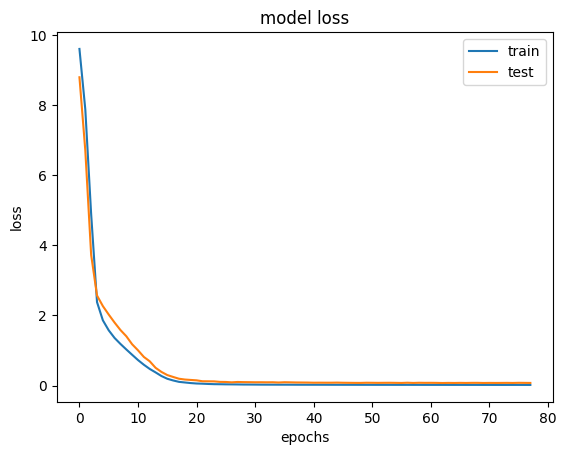

In [437]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

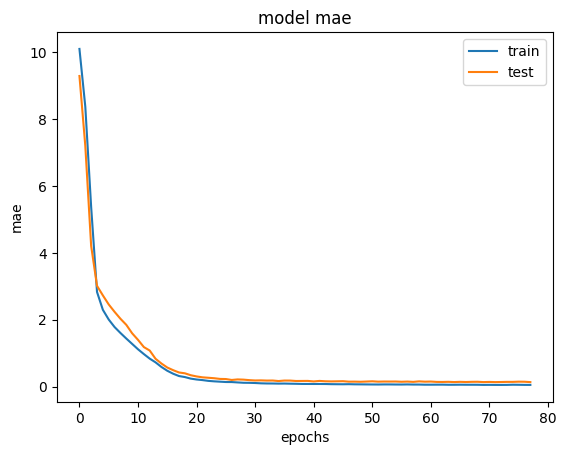

In [438]:
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('model mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [439]:
loss,mae=model.evaluate(x_test_std,y_test_log)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0278 - mae: 0.0968


In [440]:
print(mae,loss)

0.09681523591279984 0.027836240828037262


In [444]:
y_pred_log=model.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [445]:
y_pred = np.expm1(y_pred_log).flatten()

In [446]:
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

comparison.head()


,Actual,Predicted
0,57441.44414,46128.820312
1,32478.44758,30814.482422
2,49442.12107,43662.425781
3,48349.16457,43771.367188
4,36517.70996,32867.105469


In [447]:
real_mae = np.mean(np.abs(y_test - y_pred))
print("Final MAE:", real_mae)


Final MAE: 3967.1143502124996


In [448]:
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE:", rmse)


RMSE: 6880.565625277668


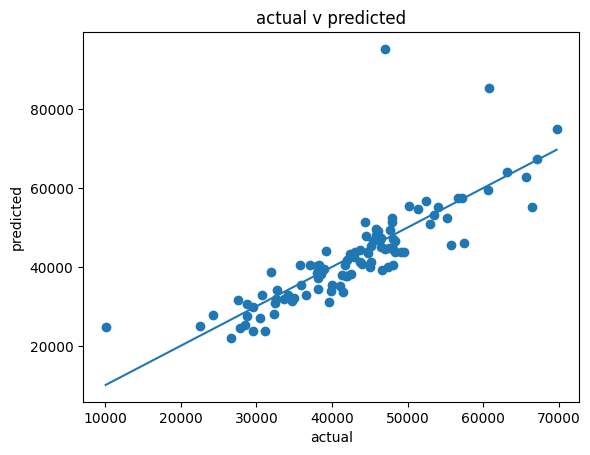

In [458]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()])
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual v predicted")
plt.show()
